In [25]:
# Commun Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import metrics
import seaborn as sns


# Naive Bayes libraries 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

# Logistic egression libraries 
from sklearn.linear_model import LogisticRegression




# SVM libraries 







# Random Forest Libraries 







# Knn libraries 





In [7]:
# titanic=pd.read_csv()
import pandas as pd
import glob

path = r'C:\Users\yaya\Desktop\Ecole microsoft Data IA\cours\Machine Learning' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

titanic = pd.concat(li, axis=0, ignore_index=True)
titanic.head()

C:\Users\yaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298


In [61]:
# titanic['Age'].sort_values().unique()
titanic['Age'].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
20.50     1
22.50     1
66.00     1
11.50     1
0.67      1
Name: Age, Length: 98, dtype: int64

## Feature Imputation 

First, I would look at datatypes and if there are any missing values. Some easy approach would merge train and test datasets and data cleaning can be performed once. It is suitable in the Kaggle competition. However, it is not suitable in reality where the data could be out of time and comes in at a later date. Therefore, you need to make generalizable code to prepare for the situation comes.

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


There are many imputation methodology:
some simple ones such as mean, median, and mode and some more complex ones such as multiple imputation by chained equations (mice). In my opinion, if the data has high signal low noise, mice might be a good option. However, generally speaking, for numerical variables, I would use median value to fill and create missing indicator because there might be a reason why the information is missing for the variable and missing indicator would prevent that information from being contaminated. Also, since the data is splitted by missing indicator, it does not matter that much what do you impute. For charateristic variables, I would just impute with 'missing'.



I replace here all the nan with 0 and where the ones who has cabin with 1 so that i can distinguish the people ho has a cabin from the one who hasn't 

i can also just replace nan with incognito to see how the people who hasn't cabin in the bottom of the ship would've survived or not 

In [54]:
titanic['Cabin'] = np.where(titanic['Cabin'].str.contains('NaN'), 0, 1)
titanic['Cabin'].unique()

array([0, 1], dtype=int64)

In [65]:
titanic['Survived'] = titanic['Survived'].replace(np.nan, 'incognito')
titanic['Survived'].unique()

array(['incognito', 0.0, 1.0], dtype=object)

Il est possible de caster les éléments du tableau en tant que `category` au lieu d'objets, car le traitement s'avère être plus rapide. 
On convertit à l'aide de la fonction `astype()`


On peut tester la différence de vitesse entre les deux types avec un `groupby()`. Les colonnes de type `category` seront plus rapides.

In [47]:
titanic['Survived'] = titanic['Survived'].astype('category')

In [48]:
titanic['Sex'] = titanic['Sex'].astype('category')

In [49]:
titanic['Name'] = titanic['Name'].astype('category')

In [51]:
titanic['Embarked'] = titanic['Embarked'].astype('category')

In [50]:
titanic['Cabin'] = titanic['Cabin'].astype('category')

# Logistic Regression 

In [46]:
titanic.Cabin.fillna(method='ffill')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1304     C50
1305     B42
1306     B42
1307    C148
1308    C148
Name: Cabin, Length: 1309, dtype: object

In [10]:
titanic.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


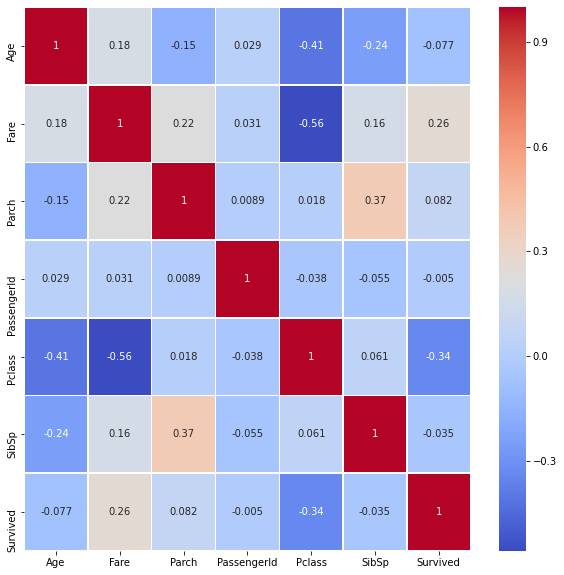

In [11]:
corr = titanic.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot= True,linewidth=0.5,cmap='coolwarm')

In [18]:
# ce dataset je le garde pour naive bayes tout a l'heure 
df1= corr[corr.Survived.apply(lambda x: abs(x))> 0.15 ]
df_c= titanic[df1.columns]
df_c


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
0,34.5,7.8292,0,892,3,0,NaN
1,47.0,7.0000,0,893,3,1,NaN
2,62.0,9.6875,0,894,2,0,NaN
3,27.0,8.6625,0,895,3,0,NaN
4,22.0,12.2875,1,896,3,1,NaN
...,...,...,...,...,...,...,...
1304,27.0,13.0000,0,887,2,0,0.0
1305,19.0,30.0000,0,888,1,0,1.0
1306,NaN,23.4500,2,889,3,1,0.0
1307,26.0,30.0000,0,890,1,0,1.0


In [20]:
titanic["Survived"].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X = titanic.drop(['Survived'], axis=1).values
y= titanic.Survived.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
y.shape


(1309, 1)

In [39]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
y=imp_mean.fit_transform(y)

In [40]:
#baseline model 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

baseline = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, y_train)
y_pred = baseline.predict(X_test)
print(round(accuracy_score(y_test, y_pred),4))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
reglog = LogisticRegression()
reglog.fit(X_train, y_train)

y_pred = reglog.predict(X_test)
#attention à ne pas calculer le score sur des données modifiées par le SC
print(reglog.score(X_train,y_train))

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], alpha = 0.25, color = "green")


In [ ]:
metrics.roc_auc_score(y_test,y_pred)

In [ ]:
metrics.f1_score(y_test, y_pred)

#### Logistic Regression CV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_train, y_train)

In [ ]:
grid_result.best_estimator_

# Random Forest 

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_1, y_train)
pred_rfc = rfc.predict(X_test_1)

In [ ]:
# ACCURACY
print(f'Accuracy score RF : {accuracy_score(y_test, predictions)}')
# we have a 96.2% accuracy

# SCORE
train_score_rf = rfc.score(X_train_1, y_train)
test_score_rf = rfc.score(X_test_1, y_test)

print('accuracy scores RF: ', train_score_rf, test_score_rf)

# CROSS VALIDATION
scores_rf = cross_val_score(rfc, X_train_1, y_train, cv=20)
print(f'CROSS VALIDATION SCORES MEAN RF: {np.mean(scores)*100} %')
# avg score of 96.0%

In [ ]:
#Confusion matrix for the random forest classification
plt.subplots(figsize=(5,5))
cf_matrix_rf = confusion_matrix(y_test, pred_rfc)
sns.heatmap(cf_matrix_rf, 
            annot=True, 
            fmt="d", 
            cmap='Greens', 
            cbar_kws={"orientation": "horizontal"},
            xticklabels = ['conventional', 'organic'],
            yticklabels = ['conventional', 'organic'])

In [ ]:
# plot le accuracy en fonction du nombre d'estimators

for i in range(1, 200):
    model_alt_rf = RandomForestClassifier(n_estimators=i)
    model_alt_rf = model_alt_rf.fit(X_train_1, y_train)
    predictions_rf = model_alt_rf.predict(X_test_1)
    accuracy_rf = accuracy_score(y_test, predictions_rf)
    plt.plot(i, accuracy_rf, marker='.', color='red')

plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

# SVM


# Knn

# Naive Bayes 

#### Notes 


The goal of balancing the dataset is to ensure the model would not overlook the minority class for which might sometimes be the one that we really care about - think about detecting earlier symptoms of cancer.